# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from fancyimpute import KNN
from functools import reduce
import plotly.express as px
import plotly.graph_objects as go 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import plotly.io as pio
pio.renderers.default='notebook'
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

(CVXPY) Aug 15 01:27:09 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/Users/amrita/opt/anaconda3/lib/python3.7/site-packages/_scs_direct.cpython-37m-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /Users/amrita/opt/anaconda3/lib/python3.7/site-packages/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /Users/amrita/opt/anaconda3/lib/python3.7/site-packages/scs/.dylibs/libgomp.1.dylib')


In [2]:
# We import the dataset that we created in our Data Wrangling section of the Capstone project 
# Import the dataset

df=pd.read_csv('/Users/amrita/Desktop/dummies_data.csv')
df.head()

,satisfaction,Age,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,...,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Eco,Eco_Plus,disloyal_Customer,Personal_Travel,Male
0,1,65,265,0,0,0,2,2,4,2,...,5,3,2,0,0,1,0,0,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,2,3,2,310,305,0,0,0,1,1
2,1,15,2138,0,0,0,3,2,0,2,...,4,4,2,0,0,1,0,0,1,0
3,1,60,623,0,0,0,3,3,4,3,...,4,1,3,0,0,1,0,0,1,0
4,1,70,354,0,0,0,3,4,3,4,...,4,2,5,0,0,1,0,0,1,0


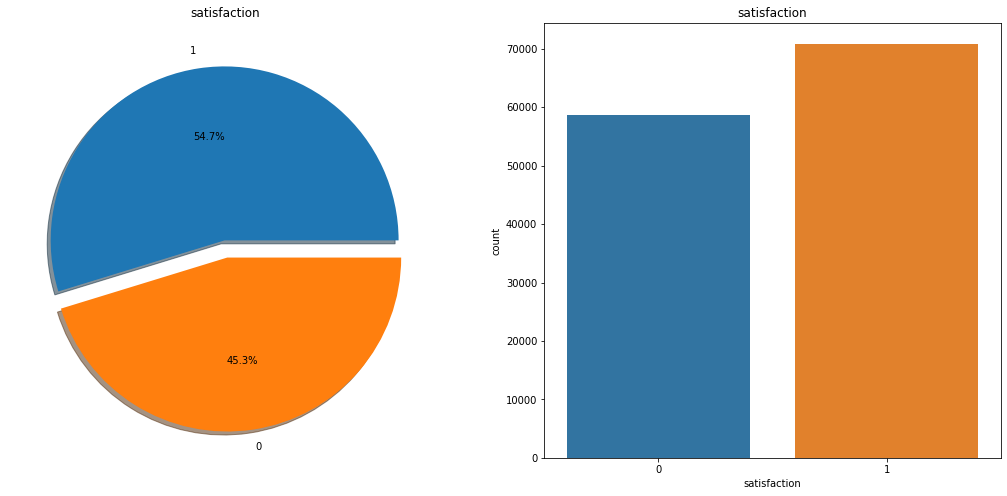

In [3]:
# We start by creating visualization of the target variable
# Our plots suggest that our classes are balanced

f,ax=plt.subplots(1,2,figsize=(18,8))
df['satisfaction'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('satisfaction')
ax[0].set_ylabel('')
sns.countplot('satisfaction',data=df,ax=ax[1])
ax[1].set_title('satisfaction')
plt.show()

54.7% people are satsfied with the Airlines and 45.3% are not satisfied with the Airlines.

In [4]:
df

,satisfaction,Age,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,...,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Eco,Eco_Plus,disloyal_Customer,Personal_Travel,Male
0,1,65,265,0,0,0,2,2,4,2,...,5,3,2,0,0,1,0,0,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,2,3,2,310,305,0,0,0,1,1
2,1,15,2138,0,0,0,3,2,0,2,...,4,4,2,0,0,1,0,0,1,0
3,1,60,623,0,0,0,3,3,4,3,...,4,1,3,0,0,1,0,0,1,0
4,1,70,354,0,0,0,3,4,3,4,...,4,2,5,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,1,29,1731,5,5,5,3,2,5,2,...,4,4,2,0,0,1,0,1,1,0
129483,0,63,2087,2,3,2,4,2,1,1,...,1,2,1,174,172,0,0,1,1,1
129484,0,69,2320,3,0,3,3,3,2,2,...,2,3,2,155,163,1,0,1,1,1
129485,0,66,2450,3,2,3,2,3,2,2,...,2,1,2,193,205,1,0,1,1,1


# Age and Satisfaction

In [33]:
def generate_group(column_name,kind):
    group = df[[column_name,'Age']]
    group = group.groupby([column_name]).mean()
    if kind == 'bar':
        fig = px.bar(group,title = f"<b>Average Flight_Distance by {column_name}</b>")
        fig.show(renderer='iframe')
    return group

In [34]:
age = generate_group('satisfaction',kind = 'bar')

Most satisfied customers lie in the age group of 41 years approx and most dissatisfied customers lie in the age group of 38 years (approx)

# Flight Distance and Satisfaction

In [7]:
def generate_group1(column_name,kind):
    group1 = df[[column_name,'Flight_Distance']]
    group1 = group1.groupby([column_name]).mean()
    if kind == 'bar':
        fig = px.bar(group1,title = f"<b>Average Flight_Distance by {column_name}</b>")
        fig.show()
    return group1

In [8]:
Flight_Distance = generate_group1('satisfaction',kind = 'bar')

Most satisfied customers flew a flight distance of 1944.47 miles with the airlines and dissatisfied customers flew around 2025.203 miles with the airlines.

# Departure Delay and Satisfaction

In [9]:
def generate_group3(column_name,kind):
    group3 = df[[column_name,'Departure_Delay_in_Minutes']]
    group3 = group3.groupby([column_name]).mean()
    if kind == 'bar':
        fig = px.bar(group3,title = f"<b>Average Departure Delay in Minutes by {column_name}</b>")
        fig.show()
    return group3

In [10]:
Departure_Delay = generate_group3('satisfaction',kind = 'bar')

Most dissatisfied customers had an average delay of 18 minutes (approx)  and satisfied customers had an average delay of 12 minutes (approx)with the airlines.

# Arrival Delay and Satisfaction

In [11]:
def generate_group4(column_name,kind):
    group4 = df[[column_name,'Arrival_Delay_in_Minutes']]
    group4 = group4.groupby([column_name]).mean()
    if kind == 'bar':
        fig = px.bar(group4,title = f"<b>Average Arrival Delay by {column_name}</b>")
        fig.show()
    return group4

In [12]:
Arrival_Delay = generate_group4('satisfaction',kind = 'bar')

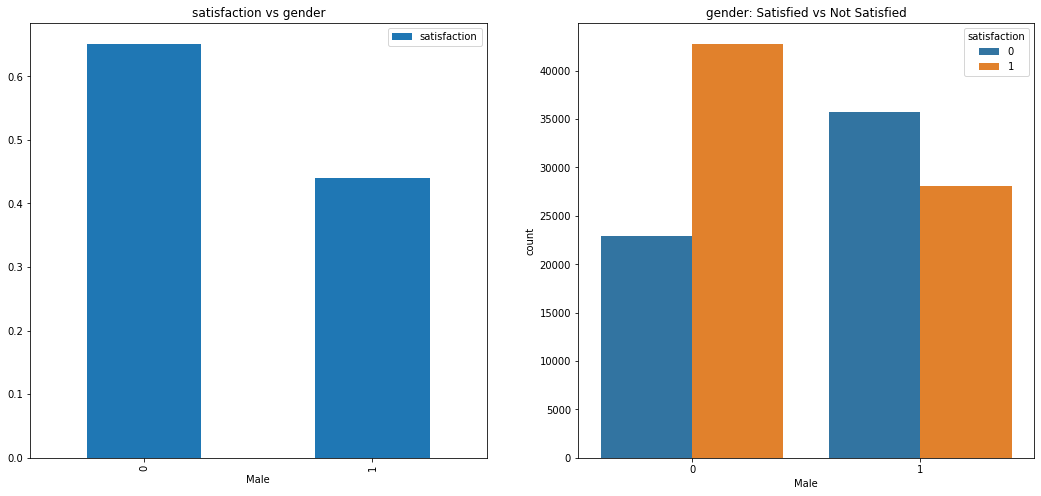

In [13]:
# Gender and Flight Satisfaction

f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Male','satisfaction']].groupby(['Male']).mean().plot.bar(ax=ax[0])
sns.countplot('Male',hue='satisfaction',data=df,ax=ax[1])
ax[1].set_title('gender: Satisfied vs Not Satisfied')
ax[0].set_title('satisfaction vs gender')
plt.show()

1st plot: Females are more satisfied than males.
2nd plot: Females are more satisfied with the airlines.  Males are more dissatisfied with the airlines

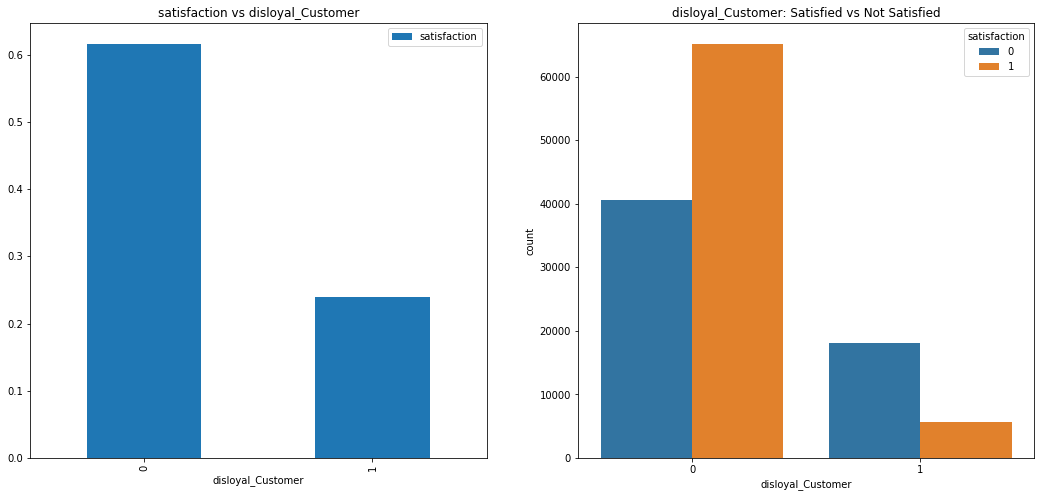

In [14]:
# Disloyal Customer and Flight Satisfaction

f,ax=plt.subplots(1,2,figsize=(18,8))
df[['disloyal_Customer','satisfaction']].groupby(['disloyal_Customer']).mean().plot.bar(ax=ax[0])
sns.countplot('disloyal_Customer',hue='satisfaction',data=df,ax=ax[1])
ax[1].set_title('disloyal_Customer: Satisfied vs Not Satisfied')
ax[0].set_title('satisfaction vs disloyal_Customer')
plt.show()

1st plot: Disloyal customers of the airlines are less satisfied compared to loyal customer
2nd plot: Loyal customers of the airlines are more satisfied than not satisfied; Disloyal customers are more dissatisfied than satisfied. 

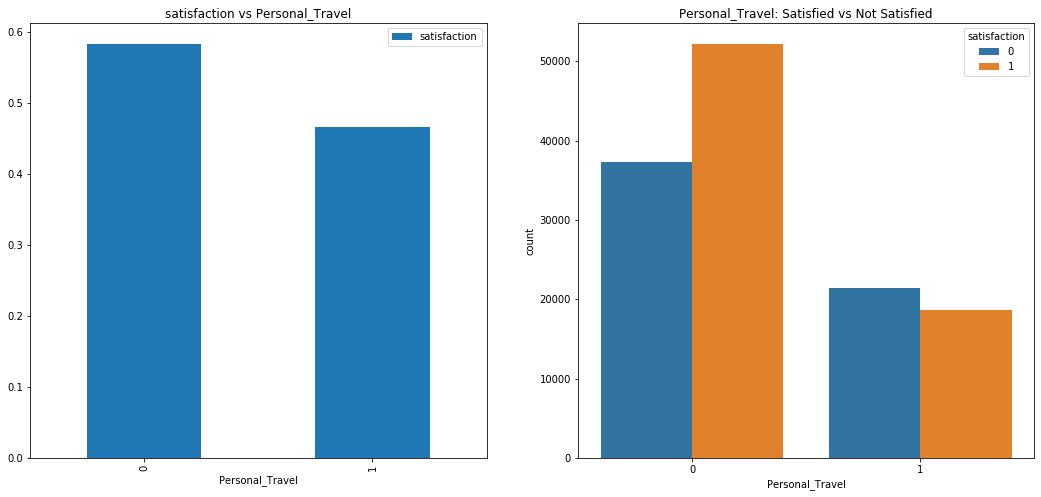

In [15]:
# Travel type vs Flight Satisfaction


f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Personal_Travel','satisfaction']].groupby(['Personal_Travel']).mean().plot.bar(ax=ax[0])
sns.countplot('Personal_Travel',hue='satisfaction',data=df,ax=ax[1])
ax[1].set_title('Personal_Travel: Satisfied vs Not Satisfied')
ax[0].set_title('satisfaction vs Personal_Travel')
plt.show()

1st plot: Customers doing business travel are more satisfied compared to personal travel customers
2nd plot: Customers doing business travel are more satisfied than not satisfied; customers doing personal travel are more dissatisfied than satisfied. 

In [16]:
pd.crosstab(df.Cleanliness,df.satisfaction, margins=True).style.background_gradient(cmap='summer_r')

satisfaction,0,1,All
Cleanliness,,,
0,5,0,5
1,4624,3122,7746
2,7953,5408,13361
3,16307,7600,23907
4,20110,28555,48665
5,9606,26197,35803
All,58605,70882,129487


A cleanliness level of 4 and 5 yields higher satsfaction among customers. 

In [17]:
df.columns

Index(['satisfaction', 'Age', 'Flight_Distance', 'Seat_comfort',
       'Departure/Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Eco',
       'Eco_Plus', 'disloyal_Customer', 'Personal_Travel', 'Male'],
      dtype='object')

In [18]:
pd.crosstab(df.Seat_comfort,df.satisfaction, margins=True).style.background_gradient(cmap='summer_r')

satisfaction,0,1,All
Seat_comfort,,,
0,10,4771,4781
1,11466,9416,20882
2,18396,10249,28645
3,18734,10362,29096
4,9858,18457,28315
5,141,17627,17768
All,58605,70882,129487


A seat comfort level of 4 and 5 yields higher satsfaction among customers. 

In [19]:
pd.crosstab(df.Inflight_entertainment,df.satisfaction, margins=True).style.background_gradient(cmap='summer_r')

satisfaction,0,1,All
Inflight_entertainment,,,
0,1007,1961,2968
1,9289,2479,11768
2,15861,3257,19118
3,19326,4807,24133
4,11696,30056,41752
5,1426,28322,29748
All,58605,70882,129487


An Inflight_entertainment level of 4 and 5 yields higher satsfaction among customers suggesting better inflight entertainment provides higher satisfaction. 

In [20]:
pd.crosstab(df.Ease_of_Online_booking,df.satisfaction, margins=True).style.background_gradient(cmap='summer_r')

satisfaction,0,1,All
Ease_of_Online_booking,,,
0,18,0,18
1,10815,2582,13397
2,14192,5695,19887
3,14366,7978,22344
4,11233,28574,39807
5,7981,26053,34034
All,58605,70882,129487


A better ease_of_online_booking service will yield more satisfaction among customers as suggested by the ratings of 4 and 5 for ease_of_Online_booking service.

In [21]:
pd.crosstab(df.Inflight_wifi_service,df.satisfaction, margins=True).style.background_gradient(cmap='summer_r')

satisfaction,0,1,All
Inflight_wifi_service,,,
0,72,58,130
1,10731,3939,14670
2,13415,13542,26957
3,13496,14022,27518
4,11382,20092,31474
5,9509,19229,28738
All,58605,70882,129487


Inflight wifi service doesn't hold much importance for satisfaction because we can see that even if inflight wifi service has a got a rating of 2, the number of customers satisfied is more than no of customers dissatisfied 

In [22]:
pd.crosstab(df.On_board_service,df.satisfaction, margins=True).style.background_gradient(cmap='summer_r')

satisfaction,0,1,All
On_board_service,,,
0,5,0,5
1,9708,3515,13223
2,11283,5834,17117
3,15898,11061,26959
4,14301,26257,40558
5,7410,24215,31625
All,58605,70882,129487


Better onboard service will yield better satisfaction among customers as suggested by the ratings of 4 and 5 for onboard service.

In [23]:
pd.crosstab(df.Leg_room_service,df.satisfaction, margins=True).style.background_gradient(cmap='summer_r')

satisfaction,0,1,All
Leg_room_service,,,
0,136,306,442
1,7953,3145,11098
2,13522,8161,21683
3,14071,8326,22397
4,12930,26653,39583
5,9993,24291,34284
All,58605,70882,129487


Better leg room service will yield better satisfaction among customers as suggested by the ratings of 4 and 5 for leg room service



In [24]:
pd.crosstab(df.Food_and_drink,df.satisfaction, margins=True).style.background_gradient(cmap='summer_r')

satisfaction,0,1,All
Food_and_drink,,,
0,1305,4617,5922
1,10326,10682,21008
2,15361,11717,27078
3,16036,12029,28065
4,11116,16013,27129
5,4461,15824,20285
All,58605,70882,129487


Better  food and drink will yield better satisfaction among customers as suggested by the ratings of 4 and 5 for Food and drink